<a id="0"></a> <br>

# Conteúdo da aula
1. [Sistemas](#chapter1)  
   1. [Exemplo de modelagem de um sistema: Sistemas elétricos](#section_1_2) 
   2. [Análise de sistemas](#section_1_2)
      1. [Uma classificação primilinar de sistemas](#section_1_2_1)
      2. [Interconexão entre sistemas](#section_1_2_2)
2. [Classificação de Sistemas](#chapter2) 
    1. [Sistemas lineares e não lineares](#section_2_1) 
       1. [Conceito de linearidade](#section_2_1_1)
       2. [Resposta de sistemas lineares e não lineares](#section_2_1_2)
    2. [Sistemas invariantes e variantes no tempo](#section_2_2) 
    3. [Sistemas instantâneos e dinâmicos](#section_2_3)
    4. [Sistemas causais e não causais](#section_2_4)  
    5. [Sistemas inversíveis e não inversíveis](#section_2_7)   
    6. [Sistemas estáveis e instaveis](#section_2_8) 

**Fontes**: 

(Edition 4.0) Signals and Systems, Published 2022 by Michael Adams ISBN-13: 978-1-990707-00-1, ISBN: 1-990707-00-9

(2º Edição) Sinais e Sistemas Lineares, Puvlicado em 2004 - Tradução do original Linear Systems and Signals, 2E, por B. P. Lathi, ISBN 0-19-515833-4

# Sistemas <a class="anchor" id="chapter1"></a>

Um sistema é uma entidade que processa um ou mais sinais de entrada e produz um ou mais sinais de saída. 

<img src ="../figs/system.png"  width = "400">

A teoria de sistemas envolve uma grande variedade de sistemas, tais como elétricos, mecânicos, hidráulicos, acústicos, eletromecânicos e químicos, além de sistemas sociais, políticos, econômicos, biológicos...

Um sistema pode ser uma **entidade física**, constituída por componentes físicos (implementação em hardware) ou pode ser uma **entidade abstrata**, constituída po um algoritmo que calcula o sinal de saída a partir de um sinal de entrada (implementação em software).

Falando genericamente, um sistema físico é constituído por componentes interconectados, os quais são caracterizados por sua relação terminal (entrada/saída). Além disso, o sistema é governado pelas leis de interconexão.

Por exemplo, em sistemas elétricos, as relações terminais são as relações tensão/corrente que conhecemos para resistores, capacitores, indutores, transformadores, transistores e assim por diante, além das leis de interconexão (por exemplo, leis de Kirchhoff). 

Usando estas leis, podemos determinar equações matemáticas relacionando as saídas às entradas de um sistema. Estas equações, então, representam o **modelo matemático** do sistema.

O estudo de sistemas consiste em três grandes áreas: modelagem matemática, **análise** e **projeto**. O foco dessa disciplina está na **análise de sistemas**.

## Exemplo de modelagem de um sistema: Sistemas elétricos <a class="anchor" id="section_1_1"></a>

O primeiro passo na análise de um sistema é a construção do modelo do sistema, o qual é a expressão matemática ou regra que aproxima satisfatoriamente o comportamento dinâmico do sistema. 

Aqui, vamos dar um exemplo de um sistema contínuo no tempo: Um circuito elétrico.

Para construir um modelo de sistema, devemos estudar as **relações entre as diferentes variáveis do sistema**. No caso dos sistemas elétricos, temos:

* a relação tensão-corrente de cada elemento do circuito (tal como a lei de Ohm para o resistor).
* as várias relações nas tensões e correntes quando vários elementos estão conectados(leis de interconexão de Kirchoff para tensão e corrente - TKT e LKC)

###  Equação de entrada-saída para o circuito RC:

Vejamos o circuito RC representado na Figura abaixo. 

Se consideramos $ v_s(t)$ como o a tensão de entrada,  $i(t)$ como a corrente e $v_c(t)$ como o sinal de saída (tensão no capacitor), podemos usar a análise simples do circuito para obter uma equação descrevendo a relação entre a entrada e a saída.

<img src = "../figs/rc_simples.png" width = "300">
<img src = "../figs/rc_simples1.png" width = "350">

$$v_c(t) = Ri(t) + \frac{1}{C} \int_{-\infty}^{t} i(\tau) d\tau$$

De modo explícito, a partir da lei de Ohm, a corrente $i(t)$ que passa pelo resistor é proporcional (com proporcionalidade constante 1/R) à queda de tensão no resistor; isto é,

$$i(t) = \frac{v_R(t)}{R}$$

Do mesmo modo, podemos relacionar $i(t)$ à taxa de mudança da tensão no decorrer do tempo no capacitor:

$$i(t) = C \frac{dv_c}{dt}$$


A análise de circuitos RC é feita aplicando as leis de Kirchhoff em que $\sum i(t) = 0$:

$$C {v_c}'(t) + \frac{v_R(t)}{R} = 0$$
$$\frac{dv_c}{dt} = -\frac{1}{RC} v_R(t)  $$





In [1]:
# importanto pacote 
import numpy as np
from scipy.integrate import odeint #módulo para trabalgar com eq. dif.
import matplotlib.pyplot as plt
# Figuras com saída formatada ara expressões matemáticas
plt.rcParams['text.usetex'] = True

In [2]:
# funcao que retorna dv_c/dt
def dv_dt(v,t, R,C):
    dvdt = -(1/(C*R)) * v
    return dvdt

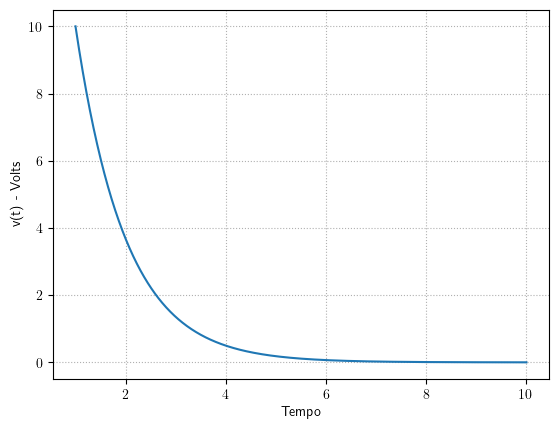

In [3]:
# Condicao inicial do sistema
v_s = 10 #volts
# parametros do sistema
C=0.5 #farad
R=2 #ohm

# Taxa de amostragem do sinal que iremos gerar
n = 1000
# Amostrando o sinal no tempo
t = np.linspace(1, 10, n)

v = odeint(dv_dt, v_s, t, args=(R,C))

# plot results
plt.plot(t,v)
plt.xlabel('Tempo')
plt.ylabel('v(t) - Volts')
plt.grid(linestyle=':')
plt.show() 

### Extensão do sistema acima para o sistema RLC:

<img src = "../figs/rlc.png" width = "350">

🟡 Para o caso do sinal de entrada ser a tensão na fonte $v_s(t)$ e o sinal de saída ser a tensão no capacitor $v_c(t)$:

$$v_c(t) =  L\frac{di}{dt} + Ri(t) + \frac{1}{C} \int_{-\infty}^{t} i(\tau) d\tau$$

Relacionando $i(t)$ à taxa de mudança da tensão no decorrer do tempo no indutor, resistor e capacitor:


$$  \frac{1}{L} \int_{0}^{t} v_l(\tau) d\tau + \frac{v_r(t)}{R} + C \frac{dv_c}{dt} = \frac{dv_c}{dt}$$

$$  \int_{0}^{t} v_l(\tau) d\tau + \frac{1}{3}v_r(t) + \frac{1}{2} \frac{dv_c}{dt} = \frac{dv_c}{dt}$$

<!-- ## Voltando ao sistema RLC: -->

🟡 Para o caso do sinal de entrada ser a tensão na fonte $v_s(t) = x(t)$ e o sinal de saída, a corrente de saída (corrente de malha) $y(t) = i(t)$.

Aplicando a lei de Kirchhoff das tensões para a malha teremos,
$$ v_L(t) + v_R(t) + v_C(t) = v_s(t)$$

Utilizando as leis de tensão-corrente de cada elemento (indutor, resistor e capacitor), podemos escrever
esta equação como:

$$L\frac{di}{dt} + Ri(t) + \frac{1}{C} \int_{-\infty}^{t} i(\tau) d\tau = v_s(t)$$
$$\frac{di}{dt} + 3i(t) + 2 \int_{-\infty}^{t} i(\tau) d\tau = v_s(t)$$

Diferenciando ambos os lados da equação:

$$\frac{d^2i}{d^2t} + 3\frac{di}{dt} + 2i(t) = \frac{dv_s}{dt}$$

## Análise de sistemas <a class="anchor" id="section_1_2"></a>

### Uma classificação preliminar de sistemas <a class="anchor" id="section_1_2_1"></a>

* Com base no número de entradas e saídas:
  * Sistema de unica entrada e única saída (SISO)
  * Sistemas de multiplas entradas e multiplas saídas (MIMO)
* Com base nos tipos de sinais a serem processados 
  * Variável independente:
    * Sistemas de tempo contínuo
    * Sistemas de tempo discreto
    * Sistemas híbridos (ou sistema de dados amostrados)
  * Amplitude:
  * Sistemas analógicos
    * Sistemas digitais
    * Sistemas híbridos (ou sistema de dados quantizados)
* Com base na dimensão dos sinais a serem processados pelo sistema
  * Sistemas unidimensionais
  * Sistemas bidimensionais

<img src = "../figs/cd_systems.png" width = "600">

### Interconexão entre sistemas <a class="anchor" id="section_1_2_2"></a>

<img src = "../figs/interconexao.png" width = "700">

# Classificação de sistemas <a class="anchor" id="chapter2"></a>

## Sistemas lineares e não lineares <a class="anchor" id="section_2_1"></a>

### Conceito de linearidade <a class="anchor" id="section_2_1_1"></a>

**Um sistema cuja saída seja proporcional a sua entrada é um exemplo de um sistema linear.**

Sejam $x_1$ e $x_2$ dois sinais de entrada de um sistema e $y_1$ e $y_2$ dois sinais de saída deste mesmo sistema, se o sistema é linear, este atende a propriedade da **aditividade**, ou seja

<img src = "../figs/sl_homogeneidade.png" width = "450"><br>

Além disso, um sistema linear deve satisfazer a propriedade de **homogeneidade ou escalamento**, a qual afirma que para uma número real ou imaginário arbitrário $k$, se uma entrada aumentar $k$ vezes, seu efeito também aumentará $k$ vezes. Portanto, se

<img src = "../figs/sl_aditividade.png" width = "500">

Logo, a linearidade implica duas propriedades: homogeneidade (escalamento) e aditividade.† As duas propriedades podem ser combinadas em uma única propriedade (superposição), a qual é descrita como mostrado a
seguir. Se,

<img src = "../figs/sl_superposicao.png" width = "500">

### Respostas de sistemas lineares e não lineares <a class="anchor" id="section_2_1_2"></a>

In [4]:
# Taxa de amostragem do sinal 
n = 1000
# Definindo o domínio no tempo
t = np.linspace(0, 10, n)

### Entrada

$x_1(t) = t$ 

$x_2(t) = t^2$

Combinação linear dos sinais $x_1(t)$ e $x_2(t)$:

$x(t)  = k_1x_1(t) + k_2x_2(t)$

### Sistema 1:

$S: x(t) \rightarrow y(t) = sen(t)x(t)$

Este sistema é linear? 🧐🧐🧐

In [16]:
# Entradas: x1(t) e x2(t)
x1 = lambda t : t
x2 = lambda t : t**2

# Definindo x(t) como a comb. linear de x1(t) e x2(t)
k1 = -1
k2 = 2
x = lambda t: k1*x1(t) + k2*x2(t)

In [17]:
# saida y(t) dos sistema para a entrada x(t)
y = lambda t: np.sin(t)*x(t)

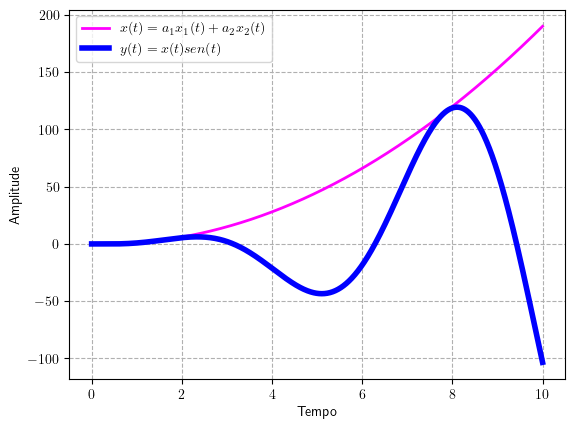

In [18]:
# visualizando a entrada x(t) e saida y(t)
plt.plot(t,x(t), color='magenta', linewidth=2)
plt.plot(t,y(t), color='blue', linewidth=4 )
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend([r"$x(t)=a_1x_1(t) + a_2x_2(t)$", r"$y(t) = x(t)sen(t)$"])
plt.grid(linestyle='--')
plt.show() 

In [ ]:
# Saídas: y1(t) e y2(t)
y1 = lambda t: np.sin(t)*x1(t)
y2 = lambda t: np.sin(t)*x2(t)

# Definindo a saída esperada y(t) como a comb. linear de y1(t) e y2(t)
y_esp = lambda t: k1*y1(t) + k2*y2(t)

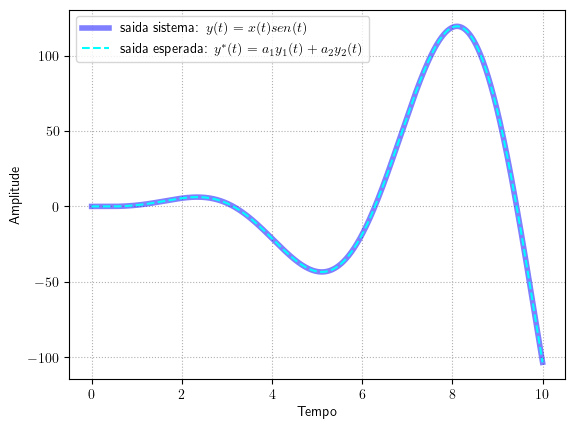

In [21]:
# visualidando a saida do sistema y(t) e a saída y(t) esperada 
plt.plot(t, y(t), color='blue', linewidth=4, alpha=0.5)
plt.plot(t, y_esp(t), color='cyan', linestyle='dashed')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend(["saida sistema: $y(t) = x(t)sen(t)$", "saida esperada: $y^*(t) = a_1y_1(t) + a_2y_2(t)$"])
plt.grid(linestyle=':')
plt.show() 

🟣 Como a saída do sistema e a saída esperada do sistema são iguais, podemos dizer que esta se trata de um **sistema linear**.

### Ex. 2.

$S: x(t) \rightarrow y(t) = sen(x(t))$

In [22]:
# saida y(t) dos sistema para a entrada x(t)
y = lambda t: np.sin(x(t))

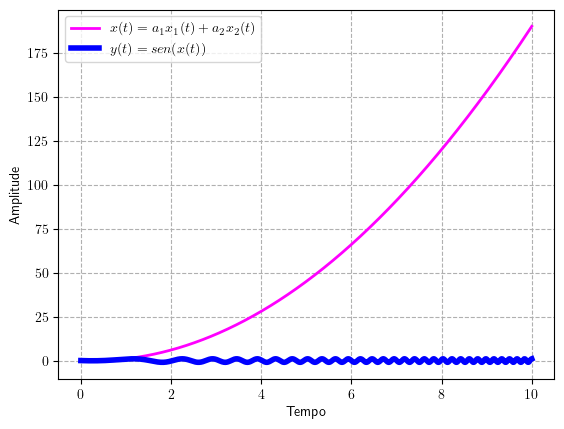

In [23]:
# visualizando a entrada x(t) e saida y(t)
plt.plot(t,x(t), color='magenta', linewidth=2)
plt.plot(t,y(t), color='blue', linewidth=4)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend([r"$x(t)=a_1x_1(t) + a_2x_2(t)$", r"$y(t) = sen(x(t))$"])
plt.grid(linestyle='--')
plt.show() 

In [24]:
# Saídas: y1(t) e y2(t)
y1 = lambda t: np.sin(x1(t))
y2 = lambda t: np.sin(x2(t))


# Definindo a saída esperada y(t) como a comb. linear de y1(t) e y2(t)
y_esp = lambda t: k1*y1(t) + k2*y2(t)

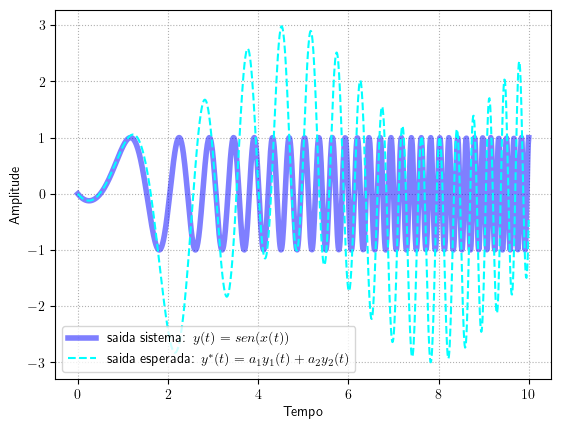

In [25]:
# visualidando a saida do sistema y(t) e a saída y(t) esperada 
plt.plot(t, y(t), color='blue', linewidth=4, alpha=0.5)
plt.plot(t, y_esp(t), color='cyan', linestyle='dashed')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend(["saida sistema: $y(t) = sen(x(t))$", "saida esperada: $y^*(t) = a_1y_1(t) + a_2y_2(t)$"])
plt.grid(linestyle=':')
plt.show() 

🟣 Como a saída do sistema e a saída esperada do sistema não são iguais, podemos dizer que esta se trata de um **sistema não linear**.

### Exercício

<img src = "../figs/ex_linearidade.png" width = "700">

## Sistemas invariantes e variantes no tempo <a class="anchor" id="section_2_2"></a>

Sistemas cujos parâmetros não são alterados com o tempo são invariantes no tempo (também chamados de sistemas com parâmetros constantes). 

Para tais sistemas, se a entrada for atrasada por $t_0$ segundos, a saída é a mesma anterior, porém atrasada também por $t_0$ segundos (assumindo que as condições iniciais também sejam atrasadas $t_0$ segundos).

<img src = "../figs/sit1.png" width = "600">
<br>
<img src = "../figs/sit2.png" width = "600">


### Ex. 1: Sistema invariante no tempo

$x(t) = t^2$

$S = x(t) \longrightarrow y(t) = \sqrt{x(t-2)}$

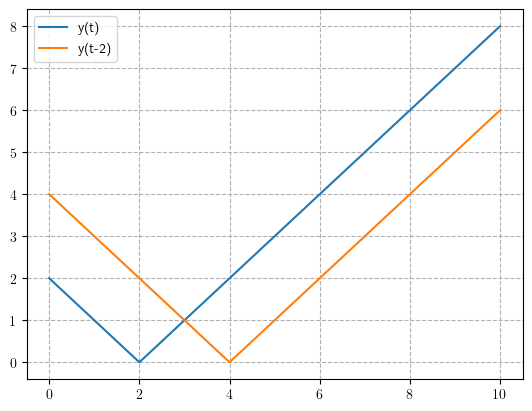

In [79]:
x = lambda t: t**2
y = lambda t: np.sqrt(x(t-2))

delay = 2

plt.plot(t,y(t))
plt.plot(t,y(t-delay))
plt.legend([r'y(t)', r'y(t-2)'])
plt.grid(linestyle='--')
plt.show()

### Ex. 2: Sistema variante no tempo

$S : x(t) \longrightarrow y(t) = sen(t)x(t-2)$

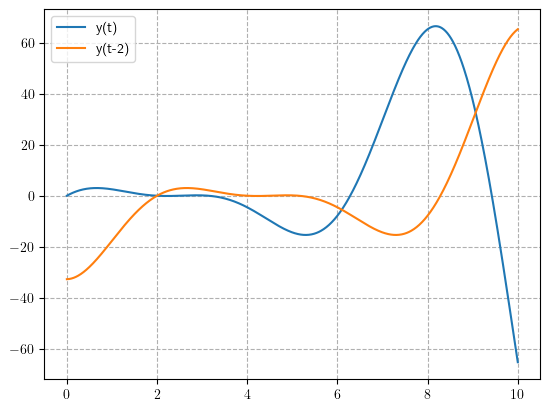

In [26]:
y = lambda t: np.sin(t)*x(t-2)

delay = 2

plt.plot(t,y(t))
plt.plot(t,y(t-delay))
plt.legend([r'y(t)', r'y(t-2)'])
plt.grid(linestyle='--')
plt.show()

### Sistemas LIT

Sistemas Lineares e invariantes no tempo recebem uma denominação especial. Eles são chamados de sistemas LIT.

Circuitos RLC, por exemplo, são geralmente tratados como sistemas LIT em análises teóricas sob condições ideais. Contudo, na prática, é importante considerar as limitações e condições específicas do sistema.

Nós iremos explorar as características de sistemas LIT no decorrer desta disciplina.



### Exercício

<img src = "../figs/ex_invariancia.png" width = "700">

## Sistemas instantâneos e dinâmicos <a class="anchor" id="section_2_3"></a>

Como observado anteriormente, a saída de um sistema em um instante $t$ qualquer geralmente depende de todo o passado da entrada. 

Entretanto, em uma classe especial de sistemas, a saída a qualquer instante $t$ depende apenas da entrada naquele instante.

Nestes sistemas, a história passada é irrelevante na determinação da resposta. Tais sistemas são chamados de **sistemas instantâneos ou sem memória**. 
Caso contrário, o sistema é chamado de **dinâmico** (ou **sistema com memória**).


* Um sistema apenas resistivo é um sistema instantâneo.
* Um sistema RLC é um sistema com dinâmico com mémoria infinita

<!-- $$y(t) = Rx(t) + \frac{1}{C}\int_{-\infty}^t x(\tau) d\tau$$


<img src = "../figs/rc_simples.png" width = "500"> -->

## Sistemas causais e não causais <a class="anchor" id="section_2_4"></a>

Para que o sistema seja **causal**, ele deve ser **dependende apenas de valores passados**. 

Quando a variável independente do sinal é o tempo, os sistemas causais são sistemas praticamente ou fisicamente realizáveis. 


### Entrada 

$x(t) = t$ 

### Ex. 1. 

$S: x(t) \rightarrow y(t) = x(t)$

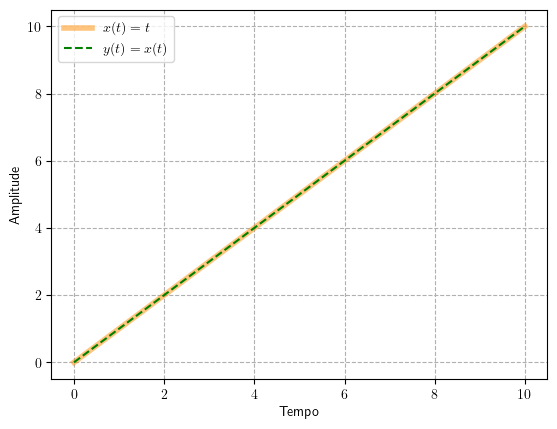

In [28]:
# Entrada : x(t) = t
x = lambda t : t
# Saida: y(t) = x(t)
y = x

# Visualizacao
plt.plot(t,x(t), color='darkorange', linewidth=4, alpha = 0.5)
plt.plot(t,y(t), color='green', linestyle='dashed')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend([r"$x(t) = t$", r"$y(t) = x(t)$"])
plt.grid(linestyle='--')
plt.show() 


🟢 Aqui, o sinal $y(t)$ depende apenas dos valores atuais de $x(t)$. 

Por exemplo, se substituirmos $t = 3$, o resultado $y(t=3)$ será exibido apenas para aquele instante de tempo. Portanto, como não depende de valor futuro de $t$, podemos chamá-lo de **sistema Causal**.

### Ex. 2. 

$S: x(t) \rightarrow y(t) = x(t-1)$



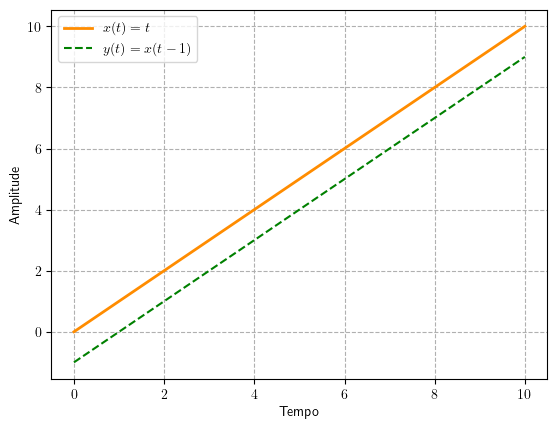

In [29]:
# saida = y(t) = x(t-1)
y = lambda t: x(t-1)

# Visualizacao
plt.plot(t,x(t), color='darkorange', linewidth=2)
plt.plot(t,y(t), color='green', linestyle='dashed')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend([r"$x(t) = t$", r"$y(t) = x(t-1)$"])
plt.grid(linestyle='--')
plt.show() 

🟢 Aqui, o sistema depende de valores passados de $x(t)$. 

Por exemplo, se substituirmos $t = 3$, a expressão será reduzida para $x(t=2)$, que é um valor passado em relação à nossa entrada. Em nenhum caso,$y(t)$ depende de valores futuros. Portanto, esse sistema também é um **sistema causal**.

### Ex. 3. 

$S: x(t) \rightarrow y(t)=x(t)+x(t+1)$

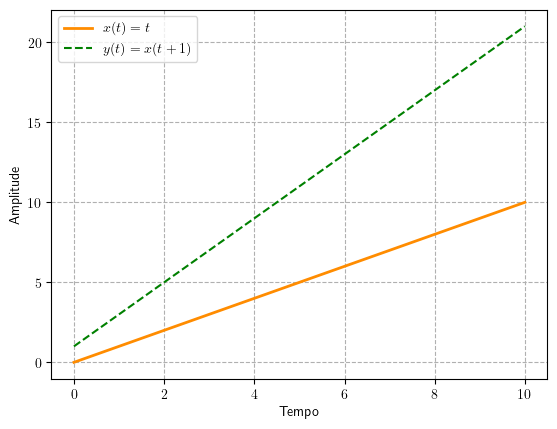

In [30]:
# saida = y(t)
y = lambda t: x(t) + x(t+1)

# Visualizacao
plt.plot(t,x(t), color='darkorange', linewidth=2)
plt.plot(t,y(t), color='green', linestyle='dashed')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend([r"$x(t) = t$", r"$y(t) = x(t+1)$"])
plt.grid(linestyle='--')
plt.show() 

🟢 Neste caso, o sistema tem duas partes:
* a parte $x(t)$, como discutimos anteriormente, depende apenas dos valores presentes. Portanto, não há nenhum problema com isso. 
* No entanto, $x(t+1)$ depende claramente dos valores futuros porque se colocarmos $t = 1$, a expressão se reduzirá a $x(t=2)$ que é o valor futuro. Portanto, o sistema **não é causal**.

### Por que estudar sistemas não causais??

A discussão anterior pode sugerir que sistemas não causais não possuem objetivos práticos. Este não é o caso. 

Eles são importantes no estudo de sistemas por diversas razões. 

* sistemas não causais são realizáveis quando a variável independente for outra que não o “tempo” (por exemplo, o espaço).
* Considere, por exemplo, uma carga elétrica de densidade q(x) colocada ao longo do eixo x para x ≥ 0. Esta densidade de carga produz um campo elétrico E(x) que está presente em todo ponto do eixo x de x=−∞ a ∞. Neste caso, a entrada [isto é, a densidade de carga
q(x)] começa em x = 0, mas sua saída [o campo elétrico E(x)] começa antes de x = 0. Claramente, este sistema de carga espacial é não causal.

### Exercício

<img src = "../figs/ex_causalidade.png" width = "700">

## Sistemas inversíveis e não inversíveis <a class="anchor" id="section_2_7"></a>

Um sistema $S$ executa uma certa operação em um sinal de entrada. 

Se pudermos obter a entrada $x(t)$ da saída $y(t)$ correspondente através de alguma operação, o sistema $S$ é dito ser inversível. 

Quando várias entradas diferentes resultam na mesma saída (tal como em um retificador), é impossível obter a entrada da saída e o sistema é não inversível (problema mal colocado).

Portanto, para um sistema inversível, é essencial que toda entrada possua uma única saída, de tal forma que exista um mapeamento de um-para-um entre a entrada e a saída correspondente. 

O sistema que efetua a operação inversa [de obtenção de $x(t)$ a partir de $y(t)$] é o sistema inverso de $S$. 

Por exemplo, se $S$ é um integrador ideal, então o sistema inverso é um diferenciador ideal.


<img src = "../figs/sistema_inverso.png" width = "500">

## Sistemas estáveis e instáveis <a class="anchor" id="section_2_8"></a>

Os sistemas também podem ser classificados como estáveis ou instáveis. 

A estabilidade pode ser interna ou externa.

Se cada entrada limitada aplicada ao terminal de entrada resultar em uma saída limitada, o sistema é dito ser externamente estável. A estabilidade externa pode ser verificada pela medição dos terminais externos (entrada e saída) do sistema. Este tipo de estabilidade também é conhecida como estabilidade no sentido BIBO (bounded-input/bounded-output*).

O conceito de estabilidade interna será explorado mais a frente, pois requer algum conhecimento do comportamento interno do sistema a ser apresentado no próximo capítulo.

### Exercício

<img src = "../figs/ex_estabilidade.png" width = "700">